In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
# Essentials
import numpy as np
import pandas as pd

# Plots
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Models
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

# Statistics
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

# Misc
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from numpy import sqrt

# Ignore useless warnings
import warnings
warnings.filterwarnings(action="ignore")

pd.set_option('display.max_columns', None)

In [41]:
train = pd.read_csv('C:/Users/admin/Desktop/data/wine_train.csv')

In [42]:
train.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,9.0,0.245,0.38,5.9,0.045,52.0,159.0,0.99500,2.93,0.35,10.2,6
1,8.2,0.420,0.29,4.1,0.030,31.0,100.0,0.99110,3.00,0.32,12.8,7
2,6.4,0.220,0.32,7.2,0.028,15.0,83.0,0.99300,3.13,0.55,10.9,8
3,5.0,0.350,0.25,7.8,0.031,24.0,116.0,0.99241,3.39,0.40,11.3,6
4,7.4,0.300,0.30,5.2,0.053,45.0,163.0,0.99410,3.12,0.45,10.3,6


In [43]:
train.isnull().sum()

fixed.acidity           0
volatile.acidity        0
citric.acid             0
residual.sugar          0
chlorides               0
free.sulfur.dioxide     0
total.sulfur.dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [44]:
train.shape

(3673, 12)

In [45]:
train.columns

Index(['fixed.acidity', 'volatile.acidity', 'citric.acid', 'residual.sugar',
       'chlorides', 'free.sulfur.dioxide', 'total.sulfur.dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [46]:
train.dtypes

fixed.acidity           float64
volatile.acidity        float64
citric.acid             float64
residual.sugar          float64
chlorides               float64
free.sulfur.dioxide     float64
total.sulfur.dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [47]:
# Describe train dataset with statistics

train.describe()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
count,3673.000000,3673.000000,3673.000000,3673.000000,3673.000000,3673.000000,3673.000000,3673.000000,3673.000000,3673.000000,3673.000000,3673.000000
mean,6.854724,0.277953,0.335108,6.413613,0.045710,35.368500,138.626736,0.994026,3.189834,0.489115,10.525709,5.893820
std,0.848973,0.099913,0.123156,5.054275,0.021747,16.974746,42.641142,0.003016,0.152739,0.112433,1.243642,0.892749
min,3.800000,0.080000,0.000000,0.600000,0.012000,3.000000,9.000000,0.987110,2.720000,0.250000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,24.000000,108.000000,0.991700,3.080000,0.410000,9.400000,5.000000
50%,6.800000,0.260000,0.310000,5.250000,0.043000,34.000000,134.000000,0.993800,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.810000,1.010000,14.200000,9.000000


In [48]:
# Print skewness ans kurtosis for the target variable('quality')

print('Skewness of cc_cons is: {} '.format(train['quality'].skew()))
print('Kurtosis of cc_cons is: {} '.format(train['quality'].kurt()))

Skewness of cc_cons is: 0.1633809787829889 
Kurtosis of cc_cons is: 0.1919479861015363 


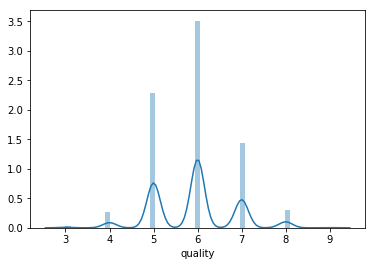

In [49]:
# Ploting distribution of target variable('quality')

sns.distplot(train['quality'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016EBD417C18>,
      dtype=object)

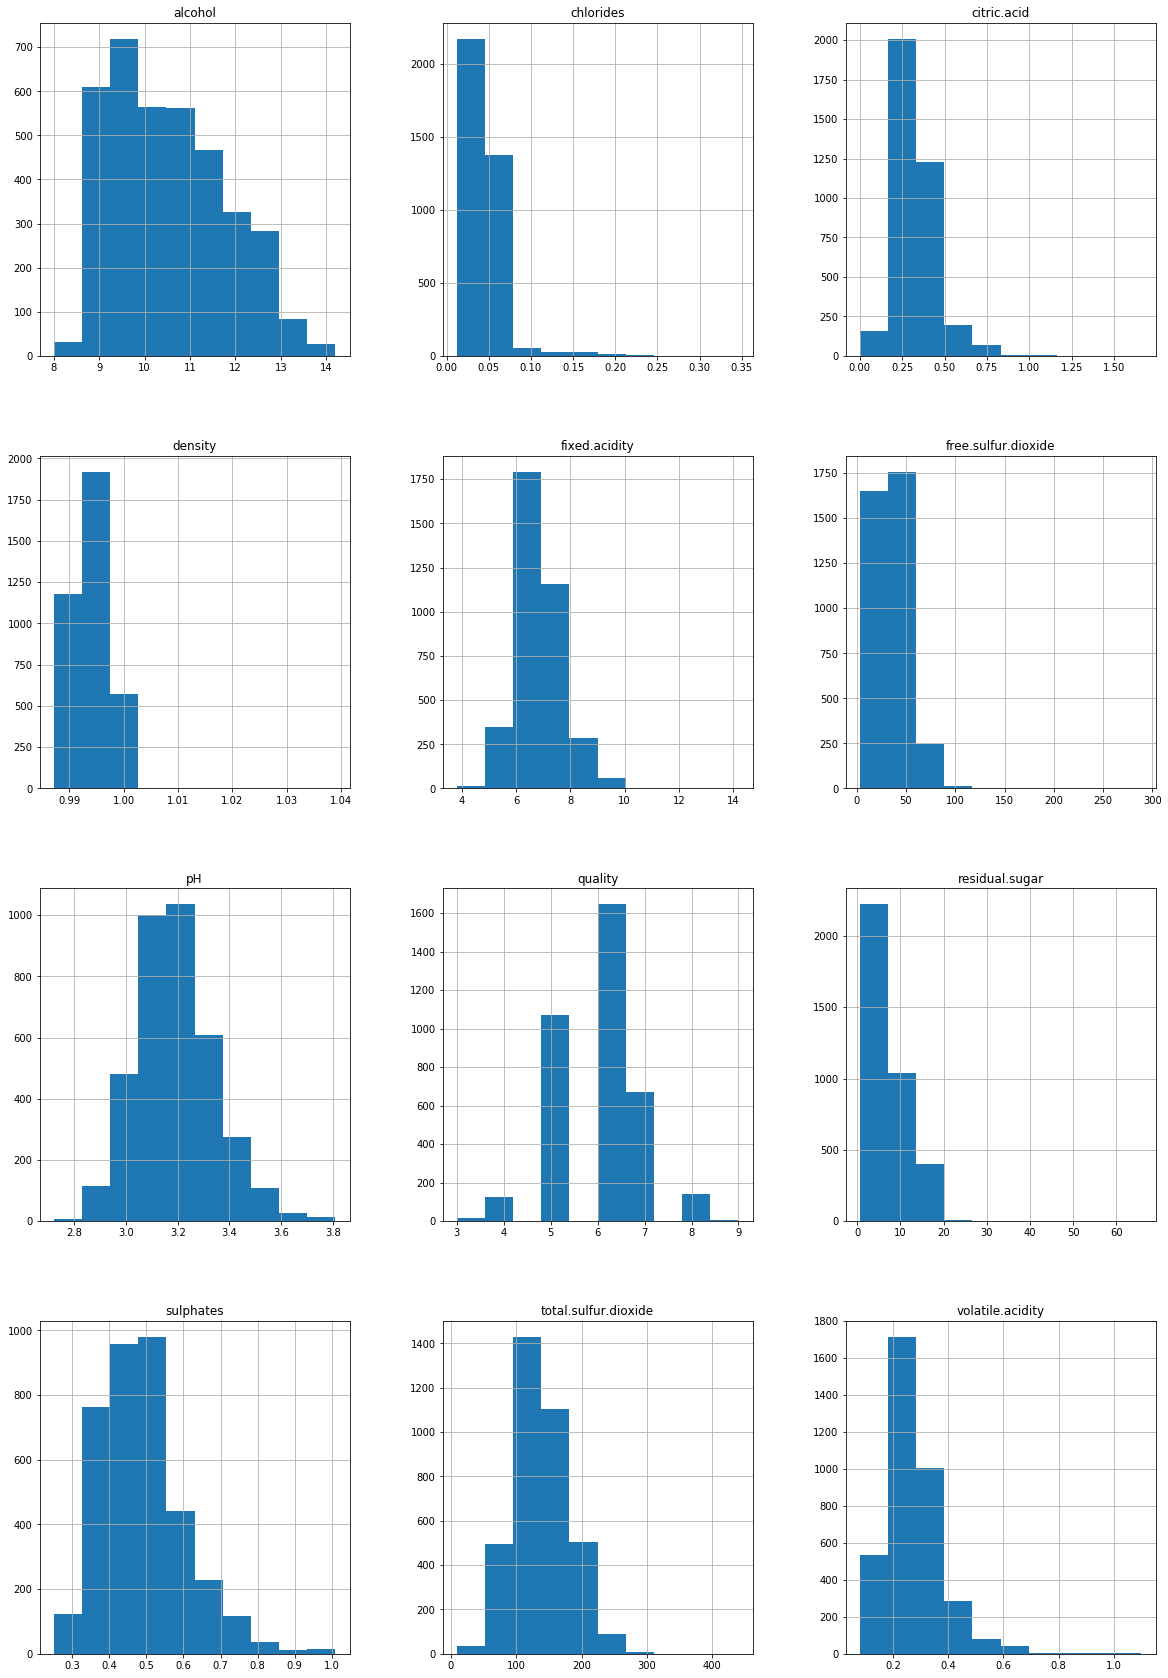

In [50]:
train.hist(figsize = (20, 30))

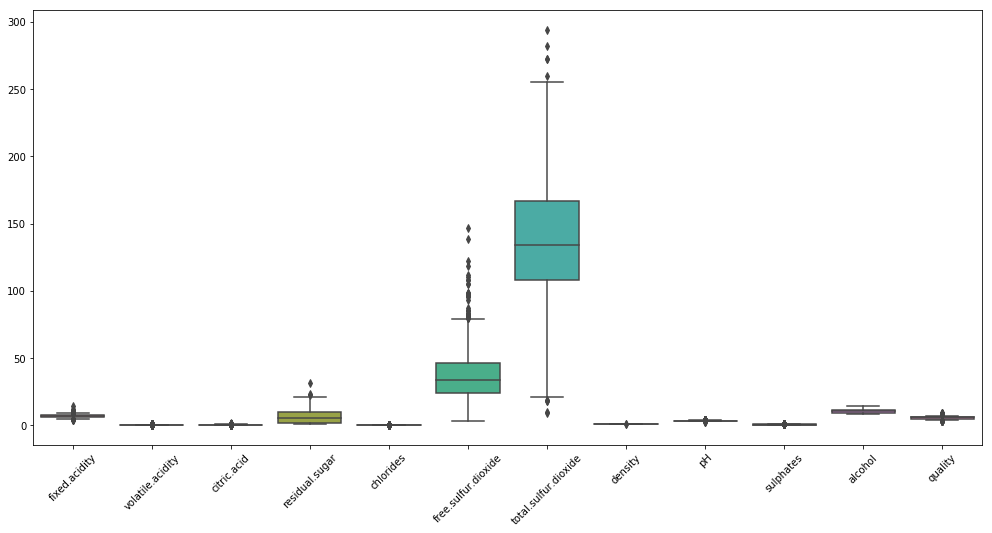

In [57]:
variable_boxplot = train[['fixed.acidity', 'volatile.acidity', 'citric.acid', 'residual.sugar', 'chlorides', 'free.sulfur.dioxide', 'total.sulfur.dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']]

plt.figure(figsize = (17, 8))
plt.xticks(rotation=45)
sns.boxplot(data = variable_boxplot)

In [14]:
print(train['free.sulfur.dioxide'].mean())
print(train['free.sulfur.dioxide'].median())
print(train['free.sulfur.dioxide'].mode())

35.36849986387149
34.0
0    29.0
dtype: float64


In [52]:
train['total.sulfur.dioxide'] = train['total.sulfur.dioxide'].mask(train['total.sulfur.dioxide'] > 300, train['total.sulfur.dioxide'].mode())

In [53]:
train['free.sulfur.dioxide'] = train['free.sulfur.dioxide'].mask(train['free.sulfur.dioxide'] > 250, train['free.sulfur.dioxide'].mode())

In [54]:
train['residual.sugar'] = train['residual.sugar'].mask(train['residual.sugar'] > 50, train['residual.sugar'].mode())

In [65]:
train.fillna(train.median(), inplace=True)

In [66]:
X = train.drop(['quality'], 1)
y = train['quality']

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [68]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2754, 11), (919, 11), (2754,), (919,))

In [69]:
from sklearn.linear_model import LinearRegression

In [78]:
liear_reg = LinearRegression()
# score_liear_reg=cross_val_score(liear_reg, X, y, cv=10)
# score_liear_reg.mean()

0.2366179207046275

In [79]:
liear_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [77]:
liear_reg.score(X_test, y_test)

0.28534686955897726

In [80]:
knn_reg = KNeighborsRegressor(n_neighbors = 2)

In [81]:
knn_reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                    weights='uniform')

In [82]:
knn_reg.score(X_test, y_test)

0.03084171420758186

In [84]:
from xgboost import XGBRegressor
parameters={'learning_rate':[0.1,0.15,0.2,0.25,0.3],
            'max_depth':range(1,3)}

In [103]:
xgb_reg = XGBRegressor()

In [104]:
xgb_reg.fit(X_train, y_train)

[14:30:27] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [105]:
xgb_reg.score(X_test, y_test)

0.4022817647133371

In [ ]:
train['quality'] = train['total.sulfur.dioxide'].mask(train['total.sulfur.dioxide'] > 300, train['total.sulfur.dioxide'].mode())

In [106]:
predictions = xgb_reg.predict(X_test)

In [107]:
# displaying predicted values

print(predictions)

[5.680246  6.333412  6.515732  6.657857  5.327379  6.613876  5.6246305
 4.6628237 5.4918    5.359108  5.6011467 5.6476316 6.394889  5.476285
 5.1478257 5.66059   6.227092  5.3895183 5.836599  5.546042  6.2035494
 6.066574  5.9905963 4.4666157 6.8951535 5.423056  5.4185996 5.3545938
 6.7920337 6.1561294 5.4190526 6.3240123 5.3536553 5.8509064 5.905494
 6.1503983 6.0165606 7.1340246 6.0173893 5.5484343 5.775063  6.47798
 6.6205735 6.7168317 6.1223636 6.0125065 6.6911616 6.575893  6.1433597
 4.988041  5.3237257 6.906572  6.2035494 5.9429717 5.355784  5.3406954
 4.790374  5.642029  5.171479  5.749941  6.1504784 6.373167  6.8731933
 6.402311  5.3317776 6.3340898 4.590547  6.256807  6.585807  5.6088147
 5.703995  5.262223  5.7950253 6.000389  6.5701995 6.4542465 6.168424
 6.2103486 6.551528  6.141812  5.67327   5.411716  6.6236787 5.527415
 6.568684  6.3876595 6.42211   6.923253  6.561092  5.528885  6.210901
 5.2992263 5.2992263 5.575583  5.8391685 5.2939014 5.8883367 6.685255
 5.8743877 5.8

In [108]:
# making dataframe of the predicted values

df = pd.DataFrame({'wine_prediction': predictions})

In [109]:
# Print first five rows of our predicted data values

df.head()

,wine_prediction
0,5.680246
1,6.333412
2,6.515732
3,6.657857
4,5.327379


In [117]:
# Save the prediction data in a file at the desire location

df.to_csv('C:/Users/admin/Desktop/data/wine_prediction.csv', index = False)

In [118]:
# Read the saved precticted file at the location 'C:/Users/admin/Desktop/data/Data Sets/Credit card cunsumption/pred_data.csv'

data = pd.read_csv('C:/Users/admin/Desktop/data/Data Sets/Credit card cunsumption/pred_data.csv')

In [119]:
# Print first five rows of our saved predicted file 

data.head()

,Unnamed: 0,wine_prediction
0,0,5.680246
1,1,6.333412
2,2,6.515732
3,3,6.657857
4,4,5.327379
